In [6]:
import numpy as np 
import gym
from gym import spaces
import random as rd

import matplotlib.pyplot as plt
from envs.NetworkOperatorEnv import NetworkOperatorEnv

In [5]:


def eps_greedy(Q, s, eps=0.1):
    '''
    Epsilon greedy policy
    '''
    if np.random.uniform(0,1) < eps:
        # Choose a random action
        return np.random.randint(Q.shape[1])
    else:
        # Choose the action of a greedy policy
        return greedy(Q, s)


def greedy(Q, s):
    '''
    Greedy policy
    return the index corresponding to the maximum action-state value
    '''
    return np.argmax(Q[s])


def run_episodes(env, Q, num_episodes=100, to_print=False):
    '''
    Run some episodes to test the policy
    '''
    tot_rew = []
    state = env.reset()

    for _ in range(num_episodes):
        done = False
        game_rew = 0

        while not done:
            # select a greedy action
            next_state, rew, done, _ = env.step(greedy(Q, state))

            state = next_state
            game_rew += rew 
            if done:
                state = env.reset()
                tot_rew.append(game_rew)

    if to_print:
        print('Mean score: %.3f of %i games!'%(np.mean(tot_rew), num_episodes))

    return np.mean(tot_rew)


def SARSA(env, lr=0.01, num_episodes=10000, eps=0.3, gamma=0.95, eps_decay=0.00005):
    nA = env.action_space.n
    nS = env.observation_space.n
    
    
    ind_ep =  []
    costs =  []

    # Initialize the Q matrix
    # Q: matrix nS*nA where each row represent a state and each colums represent a different action
    Q = np.zeros((nS, nA))
    rewards = []

    for ep in range(num_episodes):
        state = env.reset()
        done = False
        tot_rew = 0

        # decay the epsilon value until it reaches the threshold of 0.01
        if eps > 0.01:
            eps -= eps_decay

        action = eps_greedy(Q, state, eps) 
        
        next_state, rew, done, _ = env.step(action) # Take one step in the environment
    
        # choose the next action (needed for the SARSA update)
        next_action = eps_greedy(Q, next_state, eps) 
        
        # SARSA update
        Q[state][action] = Q[state][action] + lr*(rew + gamma*Q[next_state][next_action] - Q[state][action])

        state = next_state
        action = next_action
        tot_rew += rew
        #if done:
        rewards.append(tot_rew)
        
        if (ep % 200) == 0:
            print("Episode:{:5d}  Eps:{:2.4f}  Rew:{:2.4f}".format(ep, eps, tot_rew))
            ind_ep.append(ep)
            costs.append(tot_rew)
    
    print(Q)
    plt.plot(ind_ep, costs)
    #plt.xlim(4000, 5000)
    plt.title('SARSA Algorithm for Resource Allocation' )
    plt.xlabel('Number of episodes')
    plt.ylabel('Cost')
    plt.grid('on')
    #plt.rcParams["figure.figsize"] = [16, 9]
    plt.show()  
    
    
        # Test the policy every 300 episodes and print the results
   #     if (ep % 300) == 0:
   #         test_rew = run_episodes(env, Q, 1000)
   #         print("Episode:{:5d}  Eps:{:2.4f}  Rew:{:2.4f}".format(ep, eps, test_rew))
   #         test_rewards.append(test_rew)

    #return Q

Episode:    0  Eps:0.4990  Rew:10.0000
Episode:  200  Eps:0.2990  Rew:41.0000
Episode:  400  Eps:0.0990  Rew:44.0000
Episode:  600  Eps:0.0100  Rew:37.0000
Episode:  800  Eps:0.0100  Rew:42.0000
Episode: 1000  Eps:0.0100  Rew:6.0000
Episode: 1200  Eps:0.0100  Rew:37.0000
Episode: 1400  Eps:0.0100  Rew:37.0000
Episode: 1600  Eps:0.0100  Rew:40.0000
Episode: 1800  Eps:0.0100  Rew:40.0000
Episode: 2000  Eps:0.0100  Rew:49.0000
Episode: 2200  Eps:0.0100  Rew:49.0000
Episode: 2400  Eps:0.0100  Rew:40.0000
Episode: 2600  Eps:0.0100  Rew:24.0000
Episode: 2800  Eps:0.0100  Rew:29.0000
Episode: 3000  Eps:0.0100  Rew:16.0000
Episode: 3200  Eps:0.0100  Rew:22.0000
Episode: 3400  Eps:0.0100  Rew:34.0000
Episode: 3600  Eps:0.0100  Rew:22.0000
Episode: 3800  Eps:0.0100  Rew:33.0000
Episode: 4000  Eps:0.0100  Rew:37.0000
Episode: 4200  Eps:0.0100  Rew:45.0000
Episode: 4400  Eps:0.0100  Rew:36.0000
Episode: 4600  Eps:0.0100  Rew:40.0000
Episode: 4800  Eps:0.0100  Rew:38.0000
Episode: 5000  Eps:0.0100 

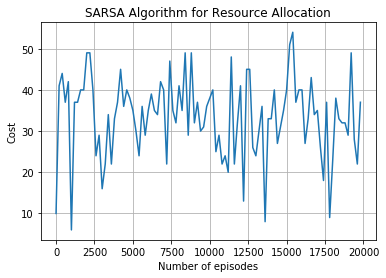

In [8]:
env = NetworkOperatorEnv(3, 30)
SARSA(env, lr=.9, num_episodes=20000, eps=0.5, gamma=0.95, eps_decay=0.001)